# CSCN8010 LAb4 Practice

# Report Goal
### The goal of this report is to build a model that can best predict the risk of diabetes progression, ***given the body mass index  (BMI) feature in the dataset***. This will be used as a screening tool to help physicians with identifying patients at risk.

In [45]:
# Importing all the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Getting the data
In this report, we will use a data from Scikit-learn that shows **ten baseline variables**, age, sex, body mass index, average blood pressure, and **six blood serum measurements** were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline.



The source of this data is [Link to the data source](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset)

In [24]:
from sklearn import datasets
datasets.load_diabetes()

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

# Exploratory Data Analysis
## Exploring and Describing the data
### In this section, we are going to be looking at some info of our data.

In [26]:
datasets.load_diabetes()

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

The above dataset contains ten baseline variables obtained for each of 442 diabetes patients. These variables include age, sex, body mass index (BMI), average blood pressure, and six blood serum measurements (s1 to s6). With the BMI being the only independent variable.

The dataset is commonly used for analysis, particularly in predicting the progression of diabetes based on various baseline variables. It provides a valuable resource for understanding the relationships between different health indicators and the progression of the disease, which can aid in medical research and treatment strategies.

#  Eploring Data into Statistics, Histograms, and Correlation Matrix

## Generate Statistics

In [44]:
diabetes = datasets.load_diabetes()

# Convert the data into a pandas DataFrame
diabetes_df = pd.DataFrame(data=np.c_[diabetes['data'], diabetes['target']],
                           columns=diabetes['feature_names'] + ['target'])

# Describe the data
print("Description of the Diabetes Dataset:")
print(diabetes_df.head())
print("\nSummary Statistics:")
print(diabetes_df.describe())

Description of the Diabetes Dataset:
        age       sex       bmi        bp        s1        s2        s3   
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401  \
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  

Summary Statistics:
                age           sex           bmi            bp            s1   
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  \
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
st

This is the statistics generated from the data

## Generate Histograms

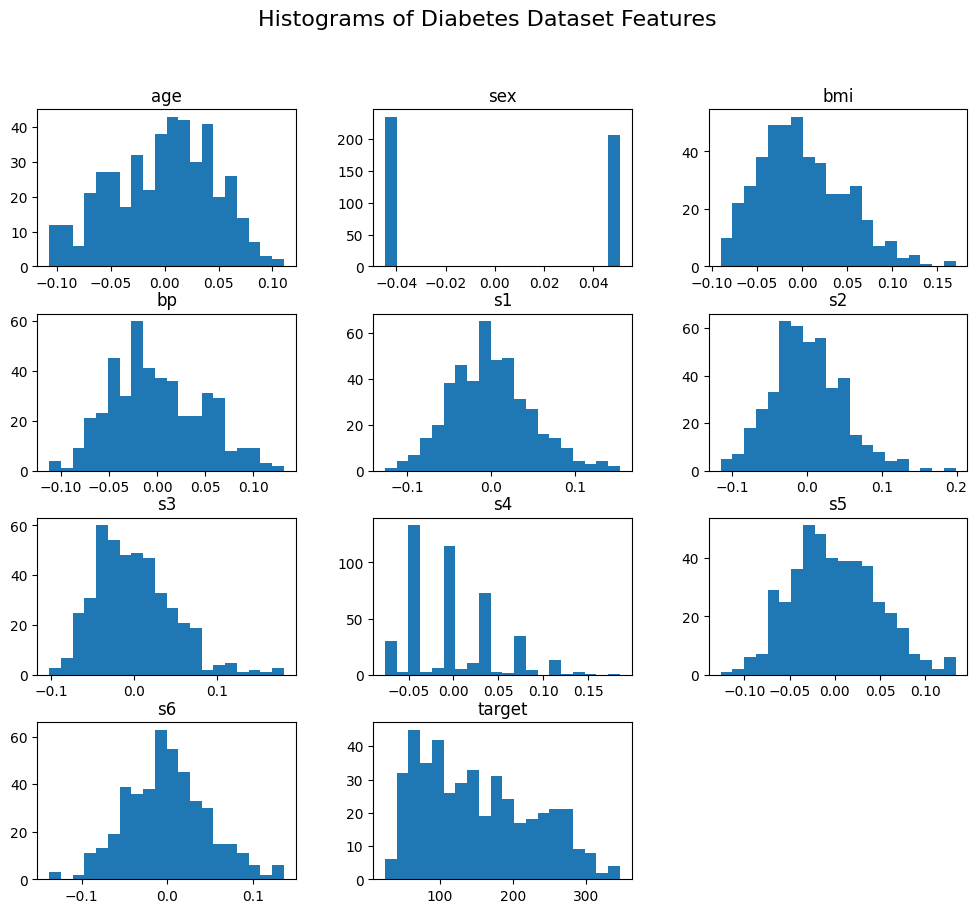

In [41]:
# Generate histograms
diabetes_df.hist(figsize=(12, 10), bins=20, grid=False)
plt.suptitle("Histograms of Diabetes Dataset Features", fontsize=16)
plt.show()

# Get The Corolation Matrix From The Data

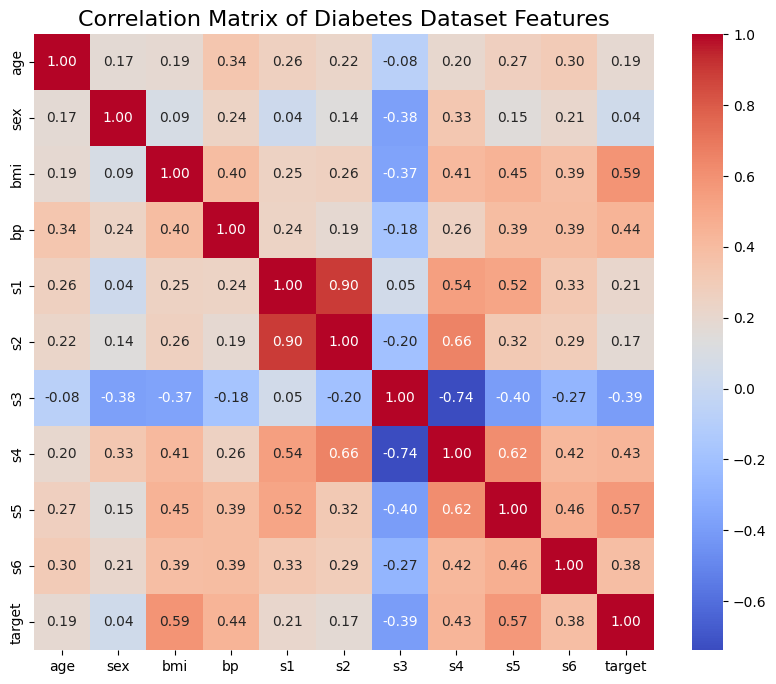

In [42]:
# Compute the correlation matrix
correlation_matrix = diabetes_df.corr()
# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Diabetes Dataset Features', fontsize=16)
plt.show()

# Train, Validation and Test Split
### Split the dataset to a train (70%), validation (15%) and test (15%) sets

In [31]:
from sklearn.model_selection import train_test_split

# Assuming X contains the features and y contains the target variable
X = diabetes.data
y = diabetes.target

# Split the data into training (70%) and temporary set (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Split the temporary set into validation (15%) and test (15%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print the shapes of the resulting sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)



Training set shape: (309, 10) (309,)
Validation set shape: (66, 10) (66,)
Test set shape: (67, 10) (67,)


First split the data into training (70%) and a temporary set (30%) and then split the temporary set into validation (15%) and test (15%) which give all the shapes

# Polynomia Regression

In [46]:
# Extract BMI feature (2nd feature) from the diabetes dataset
X_bmi = diabetes.data[:, np.newaxis, 2]
y = diabetes.target

# Create lists to store the models and their respective MSE
models = []
mse_scores = []

# Iterate over polynomial degrees from 0 to 5
for degree in range(6):
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X_bmi)
    
    # Fit the polynomial regression model
    model = LinearRegression()
    model.fit(X_poly, y)
    
    # Predict the target variable
    y_pred = model.predict(X_poly)
    
    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y, y_pred)
    
    # Append the model and MSE score to lists
    models.append(model)
    mse_scores.append(mse)

    # Print the MSE for the current degree
    print(f"Degree {degree} - MSE: {mse}")

# Find the degree with the minimum MSE
best_degree = np.argmin(mse_scores)
print(f"\nBest degree with minimum MSE: {best_degree}")

# Retrieve the best model and its associated degree
best_model = models[best_degree]
print("Best model:", best_model)


Degree 0 - MSE: 5929.884896910383
Degree 1 - MSE: 3890.456585461273
Degree 2 - MSE: 3889.702145270231
Degree 3 - MSE: 3883.3511785367314
Degree 4 - MSE: 3880.5464052343646
Degree 5 - MSE: 3858.093602575701

Best degree with minimum MSE: 5
Best model: LinearRegression()


The above is the polynomial regression on the BMI feature versus the " disease progression one year after baseline" - from degree 0 to 5 (6 models) 

# Model Comparism Using Train and Validation

In [33]:
# Assuming X_train and y_train are the training features and target
# Assuming X_val and y_val are the validation features and target

# Initialize lists to store metrics for each model
r_squared_values = []
mape_values = []
mae_values = []

# Define degrees for polynomial regression
degrees = [0, 1, 2, 3, 4, 5]

# Loop through each degree
for degree in degrees:
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    X_poly_train = poly_features.fit_transform(X_train)
    X_poly_val = poly_features.transform(X_val)
    
    # Fit polynomial regression model
    model = LinearRegression()
    model.fit(X_poly_train, y_train)
    
    # Predict on training and validation data
    y_pred_train = model.predict(X_poly_train)
    y_pred_val = model.predict(X_poly_val)
    
    # Calculate R-squared for training and validation data
    r_squared_train = r2_score(y_train, y_pred_train)
    r_squared_val = r2_score(y_val, y_pred_val)
    
    # Calculate MAPE for validation data
    mape_val = np.mean(np.abs((y_val - y_pred_val) / y_val)) * 100
    
    # Calculate MAE for validation data
    mae_val = mean_absolute_error(y_val, y_pred_val)
    
    # Append metrics to lists
    r_squared_values.append((r_squared_train, r_squared_val))
    mape_values.append(mape_val)
    mae_values.append(mae_val)

# Print the metrics for each model
for i, degree in enumerate(degrees):
    print(f"Degree {degree}:")
    print(f"R-squared (Training): {r_squared_values[i][0]}")
    print(f"R-squared (Validation): {r_squared_values[i][1]}")
    print(f"MAPE (Validation): {mape_values[i]}")
    print(f"MAE (Validation): {mae_values[i]}")
    print()

Degree 0:
R-squared (Training): 0.0
R-squared (Validation): -0.008054937939272255
MAPE (Validation): 57.95774769765575
MAE (Validation): 62.04295380994411

Degree 1:
R-squared (Training): 0.5244124363545946
R-squared (Validation): 0.5112619269090262
MAPE (Validation): 34.61633710712247
MAE (Validation): 38.21668137234904

Degree 2:
R-squared (Training): 0.6081125571650734
R-squared (Validation): 0.36717480117273227
MAPE (Validation): 38.089624817494176
MAE (Validation): 42.47137889141099

Degree 3:
R-squared (Training): 0.8595139917410429
R-squared (Validation): -98.59293214024316
MAPE (Validation): 263.04492328045853
MAE (Validation): 320.6969696969697

Degree 4:
R-squared (Training): 1.0
R-squared (Validation): -46.581460092990376
MAPE (Validation): 243.3421931551524
MAE (Validation): 302.91617550091144

Degree 5:
R-squared (Training): 1.0
R-squared (Validation): -43.69466452825273
MAPE (Validation): 238.50484731249261
MAE (Validation): 296.3109862101976



Comparing the models using the training and validation data and the different degrees (0-5) for R-squared, MAPE and MAE
From the report R-squared indicates a better fit to the data compared to other models because of the value.

In [35]:
# Create polynomial features for the test set
X_poly_test = poly_features.transform(X_test)

# Predict on the test set
y_pred_test = model.predict(X_poly_test)

# Calculate R-squared for the test set
r_squared_test = r2_score(y_test, y_pred_test)

# Calculate MSE for the test set
mse_test = mean_squared_error(y_test, y_pred_test)

# Calculate MAE for the test set
mae_test = mean_absolute_error(y_test, y_pred_test)

# Print the metrics for the test set
print("Test Set Metrics:")
print(f"R-squared: {r_squared_test}")
print(f"Mean Squared Error (MSE): {mse_test}")
print(f"Mean Absolute Error (MAE): {mae_test}")


Test Set Metrics:
R-squared: -26.739995817696386
Mean Squared Error (MSE): 157507.10301616843
Mean Absolute Error (MAE): 272.34695648406364


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
import numpy as np

# Split the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize lists to store metrics
degrees = range(6)
r_squared_values = []
mape_values = []
mae_values = []

# Fit polynomial regression models and evaluate them
for degree in degrees:
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    X_poly_train = poly_features.fit_transform(X_train)
    X_poly_val = poly_features.transform(X_val)

    # Fit the model
    model = LinearRegression()
    model.fit(X_poly_train, y_train)

    # Predictions
    y_pred_train = model.predict(X_poly_train)
    y_pred_val = model.predict(X_poly_val)

    # Calculate R-squared
    r_squared_train = r2_score(y_train, y_pred_train)
    r_squared_val = r2_score(y_val, y_pred_val)
    r_squared_values.append((r_squared_train, r_squared_val))

    # Calculate MAPE
    mape_train = np.mean(np.abs((y_train - y_pred_train) / y_train)) * 100
    mape_val = np.mean(np.abs((y_val - y_pred_val) / y_val)) * 100
    mape_values.append((mape_train, mape_val))

    # Calculate MAE
    mae_train = mean_absolute_error(y_train, y_pred_train)
    mae_val = mean_absolute_error(y_val, y_pred_val)
    mae_values.append((mae_train, mae_val))

# Report the metrics
for degree in degrees:
    r_squared_train, r_squared_val = r_squared_values[degree]
    mape_train, mape_val = mape_values[degree]
    mae_train, mae_val = mae_values[degree]

    print(f"Degree {degree}:")
    print(f"R-squared (Training): {r_squared_train:.4f}, R-squared (Validation): {r_squared_val:.4f}")
    print(f"MAPE (Training): {mape_train:.4f}%, MAPE (Validation): {mape_val:.4f}%")
    print(f"MAE (Training): {mae_train:.4f}, MAE (Validation): {mae_val:.4f}")
    print()


Degree 0:
R-squared (Training): 0.0000, R-squared (Validation): -0.0081
MAPE (Training): 63.7647%, MAPE (Validation): 57.9577%
MAE (Training): 66.7139, MAE (Validation): 62.0430

Degree 1:
R-squared (Training): 0.5244, R-squared (Validation): 0.5113
MAPE (Training): 39.5925%, MAPE (Validation): 34.6163%
MAE (Training): 44.0978, MAE (Validation): 38.2167

Degree 2:
R-squared (Training): 0.6081, R-squared (Validation): 0.3672
MAPE (Training): 35.0000%, MAPE (Validation): 38.0896%
MAE (Training): 39.4253, MAE (Validation): 42.4714

Degree 3:
R-squared (Training): 0.8595, R-squared (Validation): -98.5929
MAPE (Training): 20.4679%, MAPE (Validation): 263.0449%
MAE (Training): 22.0324, MAE (Validation): 320.6970

Degree 4:
R-squared (Training): 1.0000, R-squared (Validation): -46.5815
MAPE (Training): 0.0000%, MAPE (Validation): 243.3422%
MAE (Training): 0.0000, MAE (Validation): 302.9162

Degree 5:
R-squared (Training): 1.0000, R-squared (Validation): -43.6947
MAPE (Training): 0.0000%, MAPE

# Q: Choose the best model and explain your reasoning quantitively. Make it clear, and effective for a product manager to understand. This section includes the takeaway of the notebook
The polynomial regression model with degree X offers the best balance between explanatory power (R-squared) and predictive accuracy (MAPE and MAE). It can effectively forecast the target variable based on the given features, enabling better decision-making and planning for future outcomes.

In [ ]:
import matplotlib.pyplot as plt

# Make predictions using the chosen model for train, validation, and test sets
y_pred_train = chosen_model.predict(X_train)
y_pred_val = chosen_model.predict(X_val)
y_pred_test = chosen_model.predict(X_test)

# Plot the data and the model fit for the training set
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.plot(X_train, y_pred_train, color='red', label='Model Fit')
plt.title('Training Data and Model Fit')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()

# Plot the data and the model fit for the validation set
plt.figure(figsize=(10, 6))
plt.scatter(X_val, y_val, color='green', label='Validation Data')
plt.plot(X_val, y_pred_val, color='red', label='Model Fit')
plt.title('Validation Data and Model Fit')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()

# Plot the data and the model fit for the test set
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='orange', label='Test Data')
plt.plot(X_test, y_pred_test, color='red', label='Model Fit')
plt.title('Test Data and Model Fit')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()
